<a href="https://colab.research.google.com/github/nicecarrot/AI-Study/blob/main/2021_Tokyo_Olympic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
선수=pd.read_csv("선수.csv")

In [ ]:
선수.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [ ]:
#데이터 컬럼명 변경하는 함수 
선수_이름변경=선수.rename(columns={"Name":"선수이름","NOC":"국가","Discipline":"종목명"})

In [ ]:
#전체적인 데이터 타입과 데이터 몇개 들어있는지를 확인하기 
선수_이름변경.info()
선수_이름변경.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수이름    11085 non-null  object
 1   국가      11085 non-null  object
 2   종목명     11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


선수이름    0
국가      0
종목명     0
dtype: int64

In [ ]:
#국가별로 가장 선수가 많았던 국가 순위 확인 
#10위까지의 국가에는 미국,일본,호주,중국,독일,프랑스,캐나다,영국,이탈리아,스페인이있음.
#가장 많이 참여한 국가는 미국 615 
national_count_person=선수_이름변경.groupby(["국가"])["선수이름"].count().reset_index()\
.sort_values(by=["선수이름"],ascending=False)\
.rename(columns={"선수이름":"수"})

In [ ]:
#설마 두 종목에 나가는 선수가 있을까? 
len(선수_이름변경.선수이름.unique())

11062

In [ ]:
선수_이름변경.groupby("선수이름")["국가"].count().reset_index()\
.sort_values(by=["국가"],ascending=False).rename(columns={"국가":"선수이름별 참여종목수"})

,선수이름,선수이름별 참여종목수
5931,MARTIN Daniel,2
10813,ZHANG Xin,2
3031,GANNA Filippo,2
10303,WELLBROCK Florian,2
7477,PEREZ Maria,2
...,...,...
3691,HAUGHEY Siobhan Bernadette,1
3692,HAUKE Franzisca,1
3693,HAUKE Tobias Constantin,1
3694,HAUKENES Havard,1


In [ ]:
print("선수가 가장 많이 참여한 나라의 참여선수:%d"%national_count_person.수.max())
print("선수가 가장 적게 참가한 나라의 참여선수:%d"%national_count_person.수.min())

선수가 가장 많이 참여한 나라의 참여선수:615
선수가 가장 적게 참가한 나라의 참여선수:2


In [ ]:
#버뮤다,나우루,미얀마 선수들이 조금만 참여를 했었군..
national_count_person[national_count_person["수"]==2].국가.tolist()

['Bermuda',
 'Nauru',
 'Myanmar',
 'Andorra',
 'Vanuatu',
 'Somalia',
 'Dominica',
 'Lesotho',
 'United Republic of Tanzania',
 'Marshall Islands',
 'Brunei Darussalam',
 'Tuvalu',
 'South Sudan',
 'Central African Republic',
 'Saint Kitts and Nevis',
 'St Vincent and the Grenadines',
 'Mauritania']

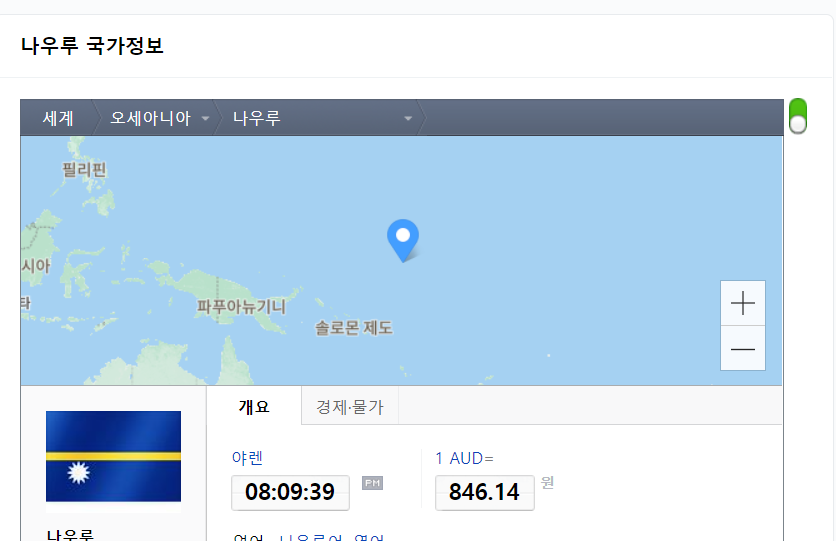

In [ ]:
메달순위=pd.read_csv("메달순위.csv")

In [ ]:
#메달을 딴 국가는 63 국가 뿐
메달순위

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,People's Republic of China,14,6,9,29,2
1,2,United States of America,13,13,10,36,1
2,3,Japan,13,4,5,22,4
3,4,ROC,7,11,7,25,3
4,5,Australia,7,2,10,19,5
...,...,...,...,...,...,...,...
58,58,C?te d'Ivoire,0,0,1,1,42
59,58,Cuba,0,0,1,1,42
60,58,Finland,0,0,1,1,42
61,58,Israel,0,0,1,1,42


In [ ]:
print("가장 메달이 많은 국가 메달 수:%d개"%메달순위.Total.max())

가장 메달이 많은 국가 메달 수:36개


<BarContainer object of 10 artists>

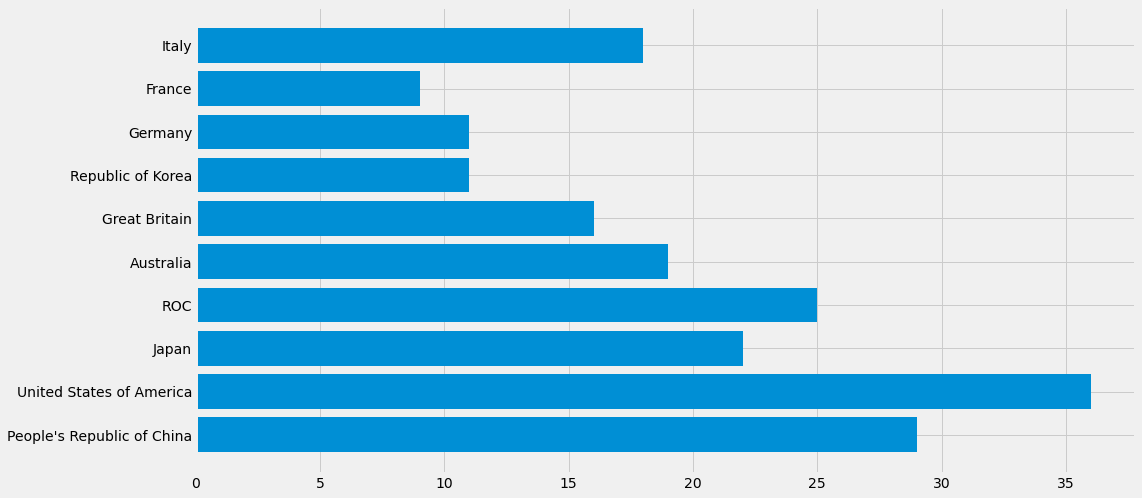

In [ ]:
메달순위_10위=메달순위.head(10)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(메달순위_10위['Team/NOC'], 메달순위_10위['Total'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


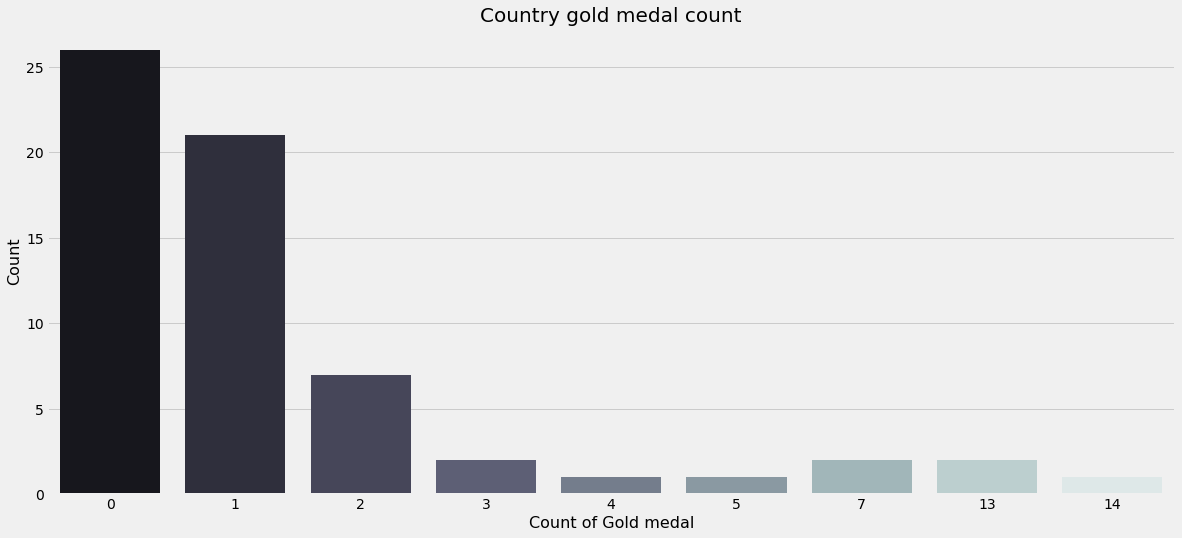

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.figure(figsize = (18, 8))

ax = sns.countplot('Gold', data = 메달순위, palette = 'bone')
ax.set_xlabel(xlabel = 'Count of Gold medal', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
ax.set_title(label = 'Country gold medal count', fontsize = 20)
plt.show()